# Multiclass classification of dry beans using computer Vision and Machine Learning Techniques

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

#### Attribute Information
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- Major axis length (L): the distance between the ends of the longest line, that can be drawn from a ban.
- Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- Aspect ratio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4piA)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1)
- ShapeFactor2 (SF2)
- ShapeFactor3 (SF3)
- ShapeFactor4 (SF4)
- Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

### EDA- Exploratory Data Analysis of Dry Beans Dataset

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the Dry Bean Dataset
df_beans= pd.read_csv('Dry_Bean_Dataset - Altered.csv')

In [6]:
df_beans.head() #head() method is used to return top n (5 by default) rows of a data frame or series

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,NaN,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
#Gives the Index Range, Non-Null values and DataType
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13410 non-null  float64
 1   Perimeter        13525 non-null  float64
 2   MajorAxisLength  13448 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13455 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13609 non-null  float64
 10  roundness        13463 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

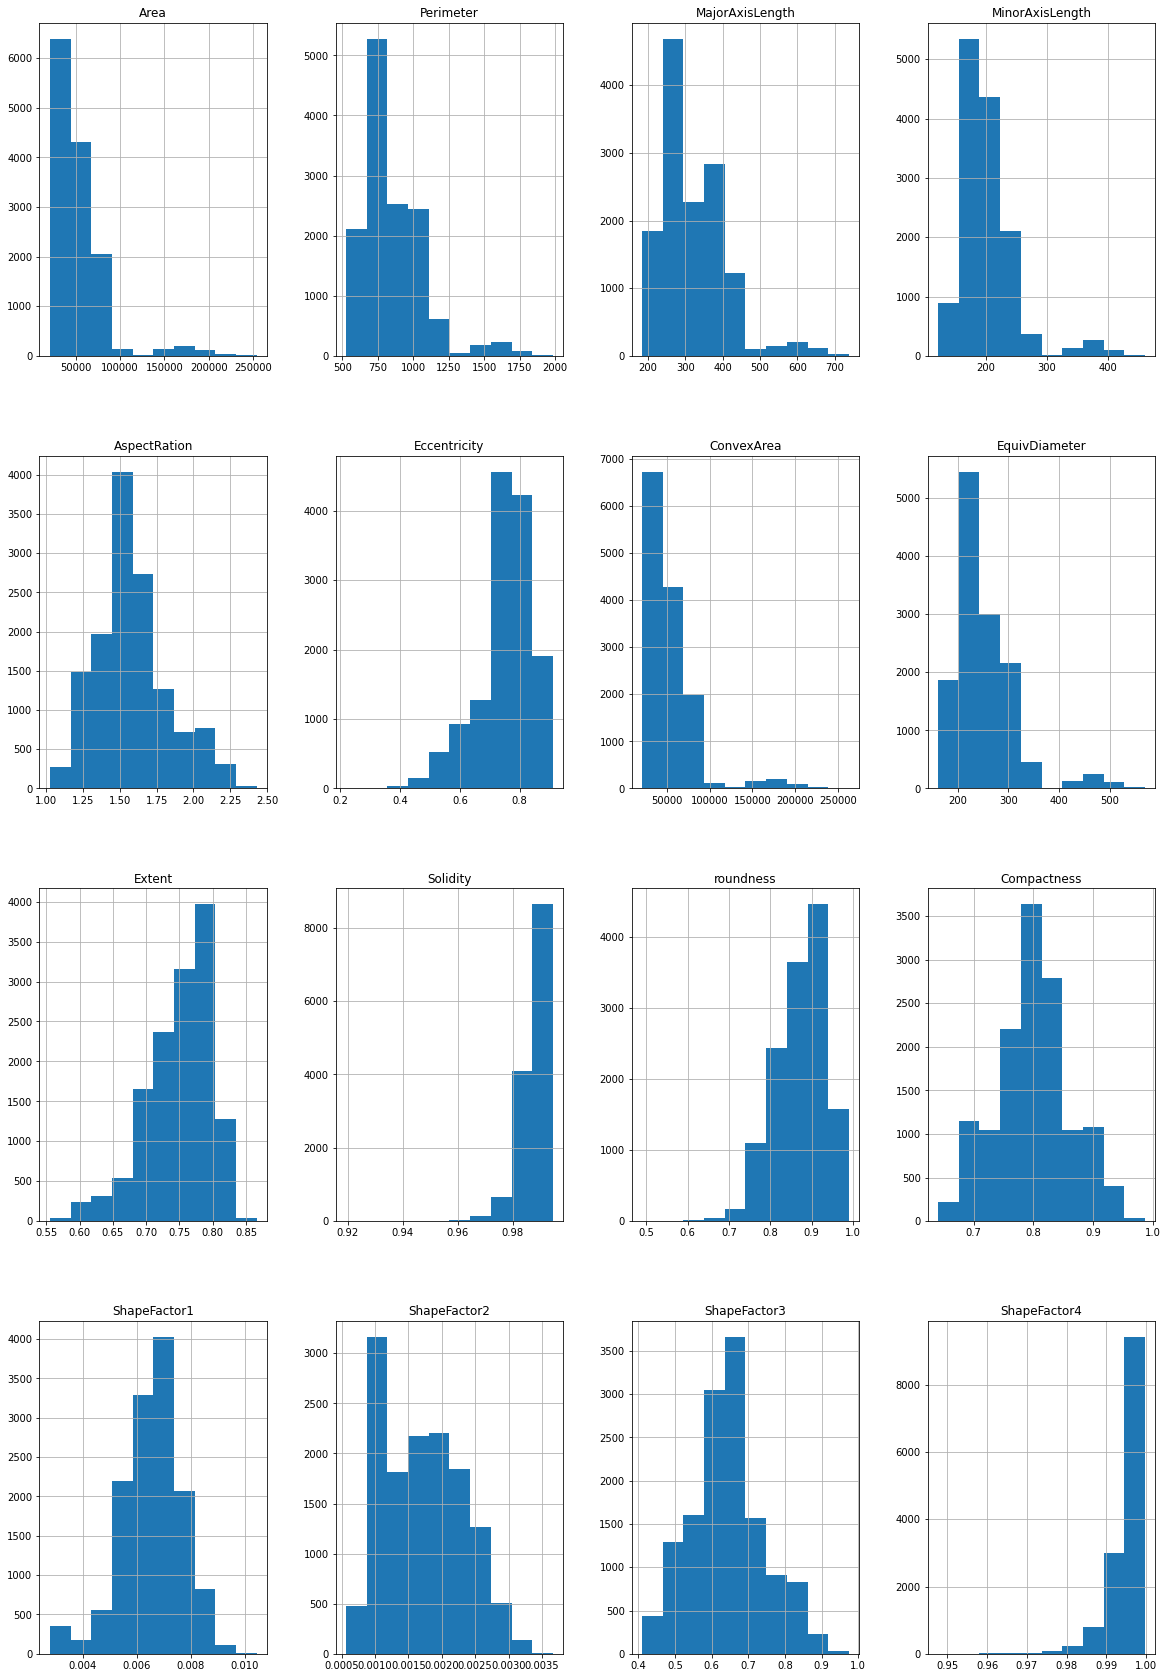

In [4]:
df_beans.hist(figsize=(20,30))#summary of distribution for relevant variables

In [35]:
#handling missing values
df_beans.fillna(df_beans.mean(),inplace=True)
#here we are filling missing values with mean() value

In [36]:
df_beans.info() # check the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [120]:
#cheacking for unique values in Class column
n_values=df_beans['Class'].nunique()
print('There are '+str(n_values)+' unique values')

There are 7 unique values


In [25]:
#Listing out the unique values from the Class Column
df_beans['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<AxesSubplot:xlabel='Class', ylabel='count'>

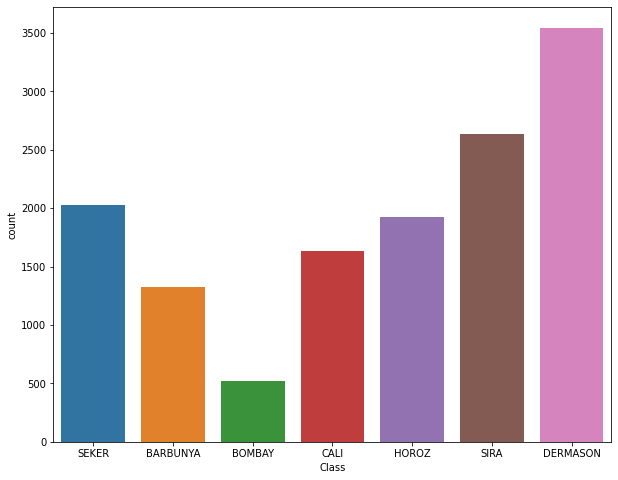

In [37]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(10, 8))
sns.countplot(x='Class',data=df_beans)

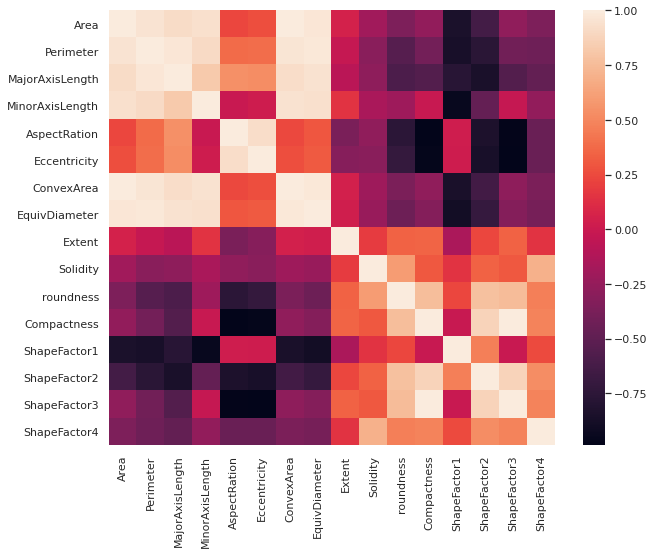

In [95]:
#Finding the relation between features
correlation=x.corr() #Image result for corr() in python corr() is used to find the pairwise correlation of all columns in the dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)
#we are using heatmap to show the correlation

<Figure size 720x576 with 0 Axes>

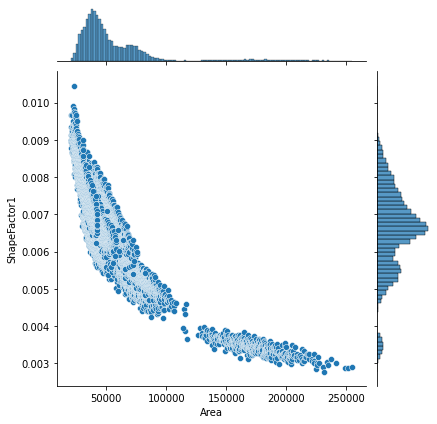

In [9]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Area', y='ShapeFactor1',data=df_beans,)
#shows that Area and shapeFactor1 are inversely proportional

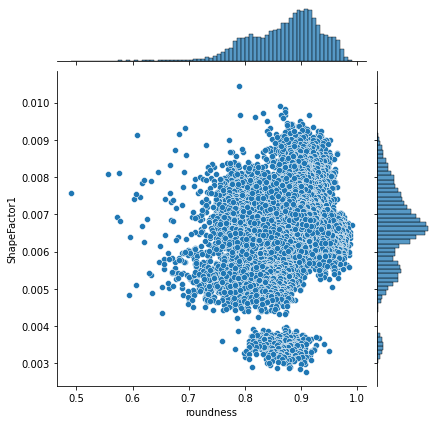

In [17]:
sns.jointplot(x='roundness', y='ShapeFactor1',data=df_beans,)

<Figure size 936x720 with 0 Axes>

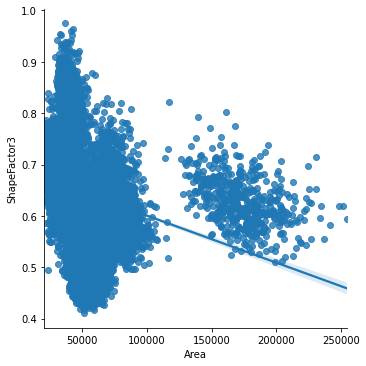

In [10]:
plt.figure(figsize=(13, 10))
sns.lmplot(x='Area', y='ShapeFactor3', data=df_beans)
#shows the dependences of ShapeFactor3 on Area

<AxesSubplot:xlabel='Class', ylabel='Compactness'>

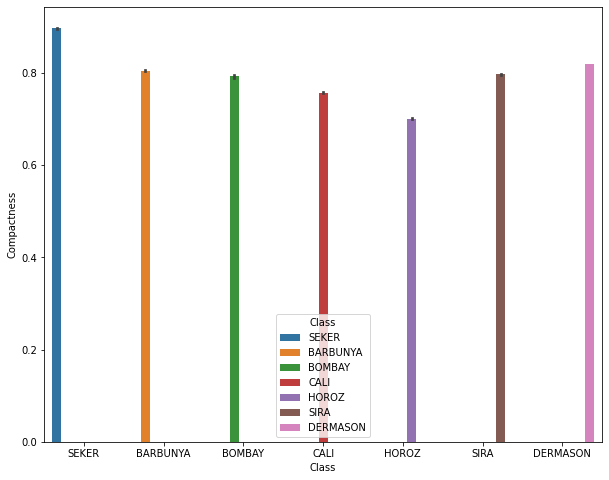

In [11]:
#comparing various other features
plt.figure(figsize=(10, 8))
sns.barplot(x='Class',y='Compactness',hue='Class',data=df_beans)

<AxesSubplot:xlabel='Class', ylabel='roundness'>

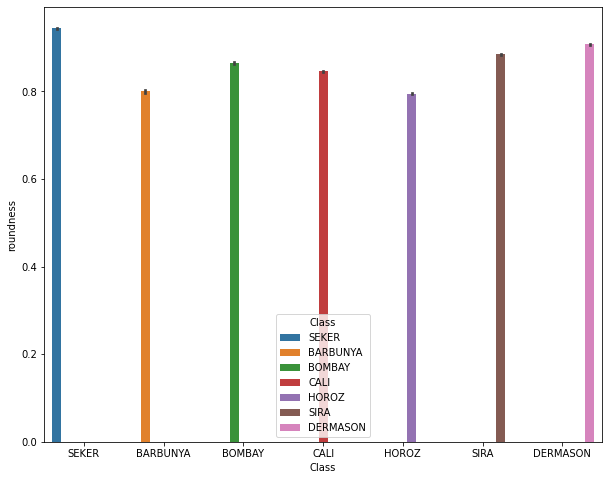

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Class',y='roundness',hue='Class',data=df_beans)

<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

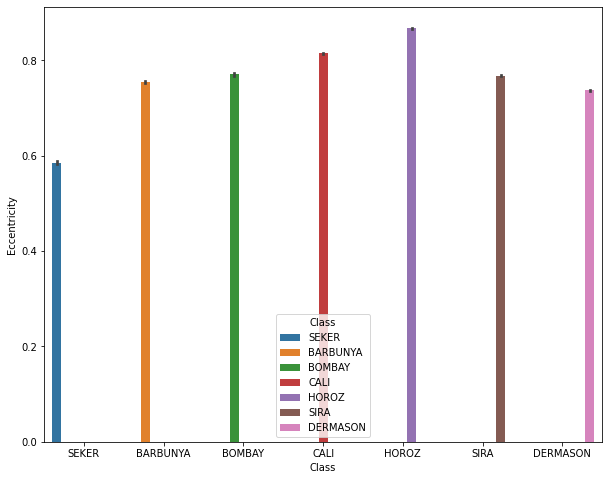

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Class',y='Eccentricity',hue='Class',data=df_beans)

<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

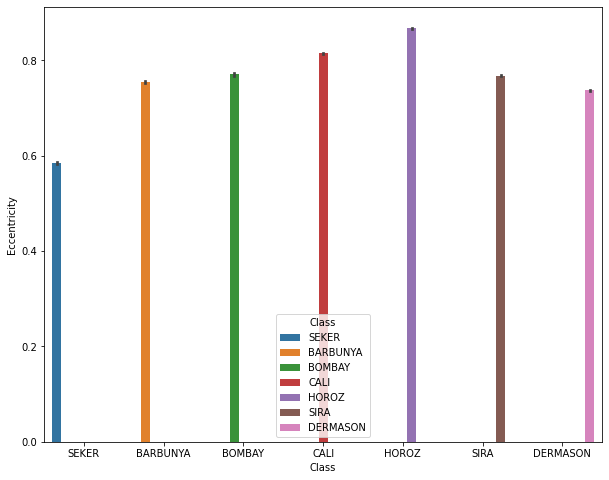

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Class',y='Eccentricity',hue='Class',data=df_beans)

<AxesSubplot:xlabel='Class', ylabel='Area'>

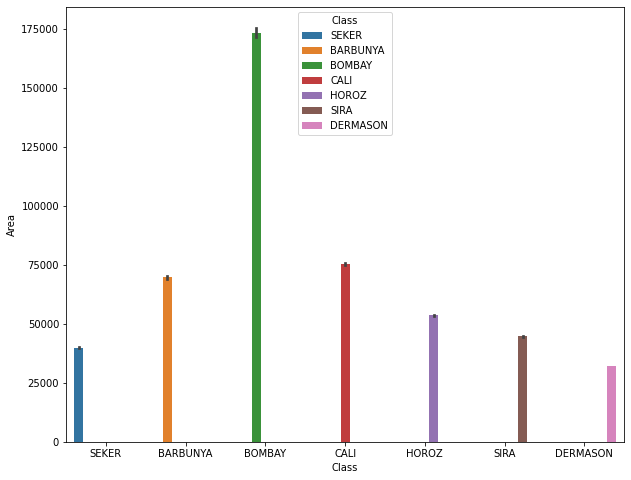

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Class',y='Area',hue='Class',data=df_beans)

## Preparing Machine Learning Models
There are various Machine Learning algorithms available for a classification problem, in this project we are using 5 algorithms and check there accuracy using various metrics.
- Support Vector Classifier
- K Nearest Neight Classifier
- Random Forest Classifier
- Decision Tree Classifer
- XGBoost Classifier

In [39]:
#creating a copy of df_beans dataset
x=df_beans.iloc[:,:-1] # Except 'Class' all the remaining features are copied to x

In [40]:
x.columns #lists out all the columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [41]:
y=df_beans['Class'] #copying the class column to variable y

In [42]:
y.unique() #listing out all the unique values

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [18]:
#we will be using train_test_split to split the dataset in train and test subsets
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
#here test subset size is 0.3, indicating the split is of 70% training and 30% test

### 1. Support Vector Classifier

In [45]:
#importing support vector classifier
from sklearn.svm import SVC

In [46]:
clf= SVC() 

In [47]:
clf.fit(x_train,y_train) #fitting the model

SVC()

In [48]:
predit_y=clf.predict(x_test) #predicting x_test using our svc model

In [53]:
# TO check the accuracy of our model we will be using accuracy_score, classification
# and confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [71]:
print(confusion_matrix(y_test,predit_y))
print(classification_report(y_test,predit_y))

[[ 22   0 266   0 108   0  16]
 [  0 163   0   0   0   0   0]
 [ 19   0 436   0  56   0   1]
 [  0   0   0 883   0 119  28]
 [ 10   0  21   9 360  22 154]
 [  0   0   0 214  13 148 249]
 [  0   0   0  45  69  98 555]]
              precision    recall  f1-score   support

    BARBUNYA       0.43      0.05      0.10       412
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.60      0.85      0.71       512
    DERMASON       0.77      0.86      0.81      1030
       HOROZ       0.59      0.62      0.61       576
       SEKER       0.38      0.24      0.29       624
        SIRA       0.55      0.72      0.63       767

    accuracy                           0.63      4084
   macro avg       0.62      0.62      0.59      4084
weighted avg       0.60      0.63      0.59      4084



In [57]:
print('SVC model accuracy score:{:.2f} %'.format(accuracy_score(y_test,predit_y)*100))

SVC model accuracy score:62.86 %


### 2. K Nearest Neighbors Classifier

In [58]:
#Importing K NeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
neigh= KNeighborsClassifier(n_neighbors=3) #KNeighborsClassifier using neighbors=3 

In [60]:
neigh.fit(x_train,y_train) #fitting the model

KNeighborsClassifier(n_neighbors=3)

In [61]:
knn_y=neigh.predict(x_test) #predicting x_test using our classifier

In [66]:
#Testing the model
print(confusion_matrix(y_test,knn_y))
print(classification_report(y_test,knn_y))

[[224   0 135   0  40   1  12]
 [  0 163   0   0   0   0   0]
 [178   0 303   0  30   0   1]
 [  0   0   0 925   1  46  58]
 [ 50   0  33  23 389   1  80]
 [  2   0   1 119   9 370 123]
 [ 20   0   6 111  60  27 543]]
              precision    recall  f1-score   support

    BARBUNYA       0.47      0.54      0.51       412
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.63      0.59      0.61       512
    DERMASON       0.79      0.90      0.84      1030
       HOROZ       0.74      0.68      0.70       576
       SEKER       0.83      0.59      0.69       624
        SIRA       0.66      0.71      0.69       767

    accuracy                           0.71      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.72      0.71      0.71      4084



In [67]:
print('KNN model accuracy score:{:.2f} %'.format(accuracy_score(y_test,knn_y)*100))

KNN model accuracy score:71.43 %


### 3. Random Forest Classifier

In [68]:
#importing RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc=RandomForestClassifier(n_estimators=100) #using estimator= 100 in this model
rfc.fit(x_train,y_train) #fitting the model
rfc_y=rfc.predict(x_test) #predicting

In [75]:
#Testing the model
print(confusion_matrix(y_test,rfc_y))
print(classification_report(y_test,rfc_y))

[[372   0  25   0   2   4   9]
 [  0 163   0   0   0   0   0]
 [ 18   0 478   0  12   0   4]
 [  0   0   0 948   3  18  61]
 [  3   0   8   6 546   0  13]
 [  2   0   0  14   0 592  16]
 [  3   0   2  81  11   2 668]]
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       412
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.93      0.93      0.93       512
    DERMASON       0.90      0.92      0.91      1030
       HOROZ       0.95      0.95      0.95       576
       SEKER       0.96      0.95      0.95       624
        SIRA       0.87      0.87      0.87       767

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [76]:
print('RandomForest model accuracy score:{:.2f} %'.format(accuracy_score(y_test,rfc_y)*100))

RandomForest model accuracy score:92.24 %


<BarContainer object of 16 artists>

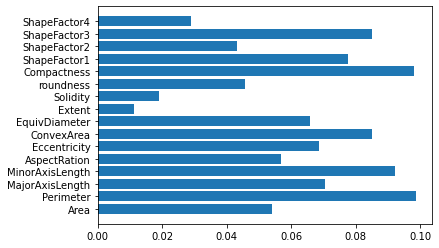

In [77]:
#barplot of Feature importance in Random Forest classifier model
plt.barh(x.columns,rfc.feature_importances_) 

### 4. Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)

In [98]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [99]:
dtc_y=dtc.predict(x_test)

In [102]:
#Testing the model
print(confusion_matrix(y_test,dtc_y))
print(classification_report(y_test,dtc_y))

[[363   0  27   0   7   3  12]
 [  0 163   0   0   0   0   0]
 [ 37   0 448   0  19   1   7]
 [  0   0   0 921   4  32  73]
 [  9   0   9   7 535   0  16]
 [  4   0   4  21   0 577  18]
 [  7   0   4  90  18   6 642]]
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.88      0.87       412
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.91      0.88      0.89       512
    DERMASON       0.89      0.89      0.89      1030
       HOROZ       0.92      0.93      0.92       576
       SEKER       0.93      0.92      0.93       624
        SIRA       0.84      0.84      0.84       767

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084



In [101]:
print('Decision Tree model accuracy score:{:.2f} %'.format(accuracy_score(y_test,dtc_y)*100))

Decision Tree model accuracy score:89.35 %


<BarContainer object of 16 artists>

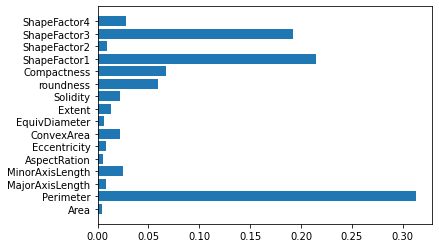

In [105]:
#listing out feature importances
plt.barh(x.columns,dtc.feature_importances_)

### 5. XGBoost Classifier

In [106]:
#importing XGBoost classifier
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [110]:
gbc_y=gbc.predict(x_test)

In [111]:
#Testing the model
print(confusion_matrix(y_test,gbc_y))
print(classification_report(y_test,gbc_y))

[[372   0  23   0   2   3  12]
 [  0 163   0   0   0   0   0]
 [ 15   0 480   0  13   0   4]
 [  0   0   0 954   1  18  57]
 [  1   0   7   5 547   0  16]
 [  3   0   0  13   0 591  17]
 [  2   0   2  82  15   3 663]]
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.92       412
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.94      0.94      0.94       512
    DERMASON       0.91      0.93      0.92      1030
       HOROZ       0.95      0.95      0.95       576
       SEKER       0.96      0.95      0.95       624
        SIRA       0.86      0.86      0.86       767

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [112]:
print('Decision Tree model accuracy score:{:.2f} %'.format(accuracy_score(y_test,gbc_y)*100))

Decision Tree model accuracy score:92.31 %


<BarContainer object of 16 artists>

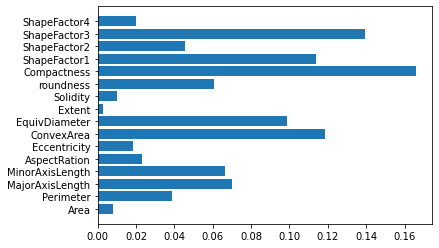

In [113]:
plt.barh(x.columns,gbc.feature_importances_)

In [118]:
acc_s=accuracy_score(y_test,predit_y)
acc_k=accuracy_score(y_test,knn_y)
acc_r=accuracy_score(y_test,rfc_y)
acc_d=accuracy_score(y_test,dtc_y)
acc_x=accuracy_score(y_test,gbc_y)

In [119]:
print('Accuracy of \n1.SVC -{:.2f}%\n2.KNN-{:.2f}%\n3.RandomForest-{:.2f}%\n4.Decision Tree-{:.2f}%,\n5.XGBoost-{:.2f}%,'.format(acc_s*100,acc_k*100,acc_r*100,acc_d*100,acc_x*100))

Accuracy of 
1.SVC -62.86%
2.KNN-71.43%
3.RandomForest-92.24%
4.Decision Tree-89.35%,
5.XGBoost-92.31%,


### Conclusion:
##### To conclude, Random Forest Regression Algorithm and XGBoost Algorithm got the highest accuracy score out of all the utilized algorithms with an accuracy of 92% by utilizing all the available parameters